this is very brief. this is not a proper exploratory data anlysis.

In [1]:
import pandas as pd

df_orders = pd.read_csv('dbt/seeds/orders.csv')
df_baskets = pd.read_csv('dbt/seeds/baskets.csv')
df_products = pd.read_csv('dbt/seeds/products.csv')
df_partners = pd.read_csv('dbt/seeds/partners.csv')
df_users = pd.read_csv('dbt/seeds/users.csv')
df_support_requests = pd.read_csv('dbt/seeds/support_requests.csv')

In [2]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              1011 non-null   int64  
 1   order_date            1011 non-null   object 
 2   user_id               1011 non-null   int64  
 3   partner_id            1011 non-null   int64  
 4   ordered_product_skus  1011 non-null   object 
 5   currency              1011 non-null   object 
 6   basket_total          1011 non-null   int64  
 7   profit                1011 non-null   float64
 8   referrer              1011 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 71.2+ KB


In [3]:
df_baskets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   order_id              2084 non-null   int64
 1   basket_item_id        2084 non-null   int64
 2   ordered_product_skus  2084 non-null   int64
 3   price_amount          2084 non-null   int64
 4   basket_total          2084 non-null   int64
dtypes: int64(5)
memory usage: 81.5 KB


In [4]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sku             41 non-null     int64 
 1   product_name    41 non-null     object
 2   price_amount    41 non-null     int64 
 3   price_currency  41 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


In [5]:
df_partners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   partner_id          5 non-null      int64  
 1   partner_name        5 non-null      object 
 2   partner_commission  5 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes


In [6]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           1000 non-null   int64 
 1   email             1000 non-null   object
 2   created_date      1000 non-null   object
 3   browser           1000 non-null   object
 4   shipping_address  1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [7]:
df_support_requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   request_id       52 non-null     int64 
 1   order_id         52 non-null     int64 
 2   request_date     52 non-null     object
 3   reason           52 non-null     object
 4   feedback_rating  52 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [9]:
df_orders.sample(5)

,order_id,order_date,user_id,partner_id,ordered_product_skus,currency,basket_total,profit,referrer
751,752,2022-05-10 21:09:35,552,4,"[31, 16]",USD,145,31.90,ppc
43,44,2022-01-25 12:54:41,122,2,"[4, 34]",USD,50,7.00,facebook
978,979,2022-05-26 01:07:06,116,4,[1],USD,225,49.50,instagram
51,52,2022-01-26 03:51:02,140,5,[29],USD,30,2.40,ppc
442,443,2022-05-02 11:38:23,272,5,"[16, 31, 16, 27, 17]",USD,333,26.64,direct


<AxesSubplot:>

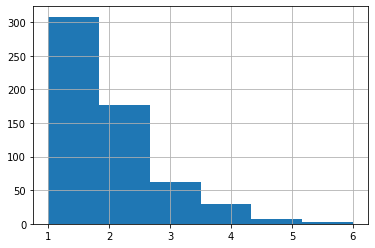

In [10]:
df_orders['user_id'].value_counts().hist(bins=6)

<AxesSubplot:>

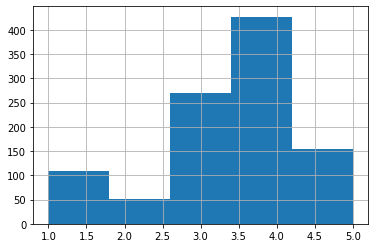

In [12]:
df_orders['partner_id'].hist(bins=5)

In [13]:
df_orders['referrer'].value_counts()

instagram    327
ppc          232
facebook     186
organic      134
direct        77
twitter       55
Name: referrer, dtype: int64

In [14]:
df_orders['ordered_product_skus']

0              [36, 28]
1          [26, 16, 30]
2              [15, 19]
3                  [10]
4                  [18]
             ...       
1006               [30]
1007    [15, 1, 28, 17]
1008               [18]
1009           [38, 35]
1010               [20]
Name: ordered_product_skus, Length: 1011, dtype: object

In [15]:
df_orders['ordered_product_skus'].value_counts()

[7]                20
[17]               16
[5]                16
[16]               16
[9]                15
                   ..
[11, 32]            1
[6, 10, 24, 35]     1
[34, 1]             1
[17, 12, 24]        1
[38, 35]            1
Name: ordered_product_skus, Length: 576, dtype: int64

<AxesSubplot:>

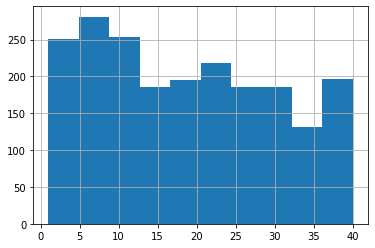

In [16]:
df_baskets['ordered_product_skus'].hist()

In [17]:
df_baskets[['order_id', 'ordered_product_skus']].groupby('order_id').agg('count')

,ordered_product_skus
order_id,
1,2
2,3
3,2
4,1
5,1
...,...
1007,1
1008,4
1009,1


In [18]:
df_products.sample(10)

,sku,product_name,price_amount,price_currency
38,39,Pothos,15,USD
10,11,Blue heritage pot large,70,USD
23,24,Magnolia,99,USD
4,5,Monstera deliciosa large,50,USD
17,18,Oregano seeds,3,USD
5,6,Sage seeds,5,USD
29,30,Poppy seeds,6,USD
40,41,Calathea,34,USD
20,21,Eucalyptus tree,54,USD
7,8,Rubber tree,25,USD


In [19]:
df_partners

,partner_id,partner_name,partner_commission
0,1,Plant Paradise,0.18
1,2,Garden of Sweden,0.14
2,3,"Peat, Fruits and Leaves",0.06
3,4,Redwood Ranch,0.22
4,5,Trowels R Us,0.08


In [20]:
df_users.sample(10)

,user_id,email,created_date,browser,shipping_address
729,730,davin_deleniti@hotmail.com,2022-04-19 06:40:02,edge,"{""city"": ""Carmella furt"", ""country"": ""AQ"", ""st..."
963,964,mozell_ut@gmail.com,2022-05-25 15:35:58,chrome,"{""city"": ""Lake Jude Von mouth"", ""country"": ""BO..."
233,234,freida_minus@hotmail.com,2022-02-06 10:10:48,chrome,"{""city"": ""New Emmanuel Lesch burgh"", ""country""..."
217,218,morgan_et@yahoo.com,2022-02-04 07:51:58,edge,"{""city"": ""Gusikowski land"", ""country"": ""BW"", ""..."
984,985,isidro_quia@gmail.com,2022-05-28 17:29:55,chrome,"{""city"": ""East Darby Vandervort borough"", ""cou..."
880,881,oren_est@yahoo.com,2022-05-13 08:27:18,chrome,"{""city"": ""Roob burgh"", ""country"": ""PK"", ""stree..."
282,283,bernie_voluptatem@yahoo.com,2022-02-14 05:13:42,netscape,"{""city"": ""Rico ton"", ""country"": ""NI"", ""street_..."
362,363,murray_nemo@yahoo.com,2022-02-26 00:41:19,edge,"{""city"": ""Port Kaley Schaden view"", ""country"":..."
901,902,jeremy_corporis@hotmail.com,2022-05-16 14:14:43,chrome,"{""city"": ""Von mouth"", ""country"": ""MC"", ""street..."
484,485,payton_accusamus@hotmail.com,2022-03-14 23:04:35,chrome,"{""city"": ""Gislason mouth"", ""country"": ""BQ"", ""s..."


In [21]:
df_users['browser'].value_counts()

chrome               502
safari               243
edge                 179
firefox               40
internet_explorer     20
netscape              14
lynx                   2
Name: browser, dtype: int64

<AxesSubplot:>

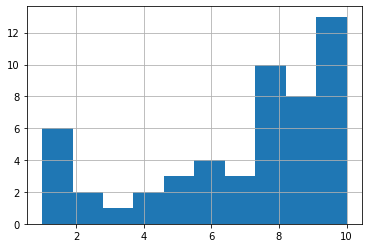

In [22]:
df_support_requests['feedback_rating'].hist()

In [23]:
df_support_requests['reason'].value_counts()

Product related query    22
Delivery issue           16
Payment issue             9
Wrong item received       5
Name: reason, dtype: int64

In [24]:
df_support_requests['order_id'].value_counts()

7      2
383    2
79     2
72     1
153    1
110    1
123    1
301    1
403    1
311    1
472    1
405    1
583    1
326    1
138    1
367    1
341    1
192    1
330    1
412    1
84     1
10     1
445    1
614    1
24     1
204    1
53     1
73     1
51     1
11     1
69     1
28     1
102    1
3      1
125    1
129    1
132    1
48     1
98     1
113    1
106    1
49     1
163    1
16     1
31     1
183    1
181    1
14     1
446    1
Name: order_id, dtype: int64

In [25]:
list(df_baskets)

['order_id',
 'basket_item_id',
 'ordered_product_skus',
 'price_amount',
 'basket_total']

In [26]:
list(df_orders)

['order_id',
 'order_date',
 'user_id',
 'partner_id',
 'ordered_product_skus',
 'currency',
 'basket_total',
 'profit',
 'referrer']

In [27]:
list(df_products)

['sku', 'product_name', 'price_amount', 'price_currency']

In [28]:
list(df_partners)

['partner_id', 'partner_name', 'partner_commission']

In [29]:
list(df_support_requests)

['request_id', 'order_id', 'request_date', 'reason', 'feedback_rating']

In [30]:
list(df_users)

['user_id', 'email', 'created_date', 'browser', 'shipping_address']